<a href="https://colab.research.google.com/github/victor-gomez-espinosa/EVENTS/blob/main/3_Analytics_on_the_model_performance1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Victor Manuel Gómez Espinosa
### victor.gomez@cimat.mx


# Dirección de los archivos

In [ ]:
#librerias
import os
CurrentPath = '/content/drive/My Drive/KUESKI_Challenge'

os.chdir(CurrentPath) #cambiar la ubicacion a la carpeta donde se encuentra este archivo
!ls #listar los documentos en esta ruta

 1_Basic_exploratory_analysis.ipynb	       Formulas_mult.py
 2_Model_implementation.ipynb		       listings_reduced.csv
 3_Analytics_on_the_model_performance1.ipynb   _missing_value.py
 3_Analytics_on_the_model_performance2.ipynb   __pycache__
'Challenge - Jr. Data Scientist (1).pdf'       resultados.csv
 datos_completos.csv			       XGBBEST.sav
 datos.csv


# Librerías

In [ ]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from sklearn.model_selection import train_test_split
from datetime import datetime
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error

Clases y funciones de mi autoría

In [ ]:
from _missing_value import MissingValueImputation #Clase que realiza la imputacion de datos faltantes en un DataFrame por distintos metodos

# Datos

In [ ]:
df=pd.read_csv('datos.csv',index_col=0,na_values=['unk','unknown',' ','  ',None]) #leemos los datos

# -	Imputación de datos
Imputamos los datos faltantes por dos razones:
-	Ver si mejora el modelo anterior
-	Y para hacer un mejor análisis de los casos en que falla ya que muchos modelos necesitan como requisito casos completos
- Imputación de datos por algoritmos robustos (arboles) con datos completos.

In [ ]:
names=df.columns #guardamos los nombres de las columnas
df.columns = range(df.shape[1]) #ponemos numeros en las columnas (necesario para el programa de imputación)
df = MissingValueImputation(method = 'trees').fit_transform(df)
df.columns =names


[02:52:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score is -20.486378388392676
[02:53:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score is -0.34753692646515444
[02:53:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score is -0.6007355752247837
[02:53:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score is -2.348793646895341
[02:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score is -0.21543955281882612
[02:54:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score is -0.30795695515543714
[02:55:01] WARNING: /workspace/s

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11263 entries, 10595 to 40200475
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_listings_count                    11263 non-null  float64
 1   latitude                               11263 non-null  float64
 2   longitude                              11263 non-null  float64
 3   accommodates                           11263 non-null  int64  
 4   bathrooms                              11263 non-null  float64
 5   bedrooms                               11263 non-null  float64
 6   beds                                   11263 non-null  float64
 7   guests_included                        11263 non-null  int64  
 8   minimum_nights                         11263 non-null  int64  
 9   availability_90                        11263 non-null  int64  
 10  number_of_reviews                      11263 non-null  int64  


In [ ]:
#si queremos repetir exactamente los mismo sin ejecutar algunas celdas
#df=pd.read_csv('datos_completos.csv') #lee los datos
#dft=df.drop(columns=['Unnamed: 0','Unnamed: 0.1','price_pred','errors','errorCat','room_type']) #cargamos los datos completos
#X, y= dft.drop(columns=['price']).values, dft.price.values

In [ ]:
X, y= df.drop(columns=['price']).values, df.price.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42) #dividimos el conjunto de prueba y entrenamiento

# Implementación del modelo

Misma configuración del modelo

In [ ]:
startTime = datetime.now()
xgbCW=xgb.XGBRegressor(seed=123,sampling_method='gradient_based',tree_method='gpu_hist', predictor='gpu_predictor',learning_rate=0.1,n_estimators=500,subsample=1,gamma=0,reg_lambda=1,colsample_bytree=1,colsample_bylevel=1,colsample_bynode=1,max_depth=12,min_child_weight=1,n_jobs=-1)
                    
hist=xgbCW.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='mae',early_stopping_rounds=50)

print(datetime.now() - startTime)

[04:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:55.232
Will train until validation_0-mae hasn't improved in 50 rounds.
[1]	validation_0-mae:49.872
[2]	validation_0-mae:44.9881
[3]	validation_0-mae:40.6823
[4]	validation_0-mae:36.8391
[5]	validation_0-mae:33.3983
[6]	validation_0-mae:30.4141
[7]	validation_0-mae:27.9821
[8]	validation_0-mae:25.9687
[9]	validation_0-mae:24.2831
[10]	validation_0-mae:22.8766
[11]	validation_0-mae:21.7644
[12]	validation_0-mae:20.908
[13]	validation_0-mae:20.115
[14]	validation_0-mae:19.5318
[15]	validation_0-mae:18.9903
[16]	validation_0-mae:18.6171
[17]	validation_0-mae:18.3179
[18]	validation_0-mae:18.0882
[19]	validation_0-mae:17.977
[20]	validation_0-mae:17.8436
[21]	validation_0-mae:17.7591
[22]	validation_0-mae:17.6999
[23]	validation_0-mae:17.6406
[24]	validation_0-mae:17.5801
[25]	validation_0-mae:17.5742
[26]	validation_0-mae:17.5348
[27]	validatio

In [ ]:
#guardamos el modelo
filename = 'XGBBEST.sav'
joblib.dump(xgbCW, filename)

['XGBBEST.sav']

In [ ]:

#xgbCW = joblib.load('XGBBEST.sav') #cargamos el modelo

[04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Evaluación

In [ ]:
# predecir datos
y_pred_train_xgb =xgbCW.predict(X_train) #de entrenamiento
y_pred_test_xgb = xgbCW.predict(X_test) #de prueba
y_pred = xgbCW.predict(X) #todo el conjunto

In [ ]:
#train
print('train')
mse=mean_squared_error(y_train,y_pred_train_xgb)
r2=r2_score(y_train,y_pred_train_xgb)
mae=median_absolute_error(y_train,y_pred_train_xgb)
print('RMSE: ',(mse)**(0.5),' r2: ',r2,' mae: ',mae)

train
RMSE:  30.839307952227585  r2:  0.9686279626078182  mae:  6.567903518676758


In [ ]:
#test
print('test')
mse=mean_squared_error(y_test,y_pred_test_xgb)
r2=r2_score(y_test,y_pred_test_xgb)
mae=median_absolute_error(y_test,y_pred_test_xgb)
print('RMSE: ',(mse)**(0.5),' mae: ',mae)

test
RMSE:  40.31645586459496  mae:  8.738807678222656


Observaciones:
-	El modelo claramente se vio beneficiado de la imputación de datos, debido a la disminución del MAE de prueba de 10.06 a 8.73



Caracteristicas más importantes

In [ ]:
feat_names=np.array(list(dft.drop(columns=['price']).columns))
importances=xgbCW.feature_importances_

d = {"Caracteristicas": feat_names,
      "Importances(Gain)": importances
      }

dfimp=pd.DataFrame(d).sort_values(by=['Importances(Gain)']).tail(10)

px.bar(dfimp, x="Importances(Gain)", y="Caracteristicas", title="10 Características más importantes",orientation='h')

# Analítica del rendimiento del modelo

In [ ]:
df['price_pred']=y_pred #guardamos las predicciones
errors=np.abs(y-y_pred) #calculamos y guardamos los errores
df['errors']=errors


In [ ]:
#Obtenemos un margen de referencia para los errores
upper=np.mean(errors)+np.std(errors)
er=errors>upper
z=np.zeros((len(er)))
z[er]=1
df['errorCat']=z

In [ ]:
df2=pd.read_csv('listings_reduced.csv',index_col=0,na_values=['unk','unknown',' ','  ',None]) #leemos los datos originales para cargar la variable tipo de cuarto
room_type=df2.room_type.values
df['room_type']=room_type

In [ ]:
df.to_csv('datos_completos.csv') #guardamos los datos completos

In [ ]:
df=pd.read_csv('datos_completos.csv') #lee los datos

-	Análisis exploratorio de los errores

In [ ]:
df[['price',	'price_pred',	'errors']].describe()

,price,price_pred,errors
count,11263.000000,11263.000000,11263.000000
mean,65.960327,61.877238,13.085934
std,157.751168,136.808182,30.245614
min,8.000000,7.992053,0.000587
25%,34.000000,35.972275,3.042103
50%,48.000000,46.873943,6.932198
75%,70.000000,63.901920,14.016729
max,7000.000000,6322.162000,1189.015137


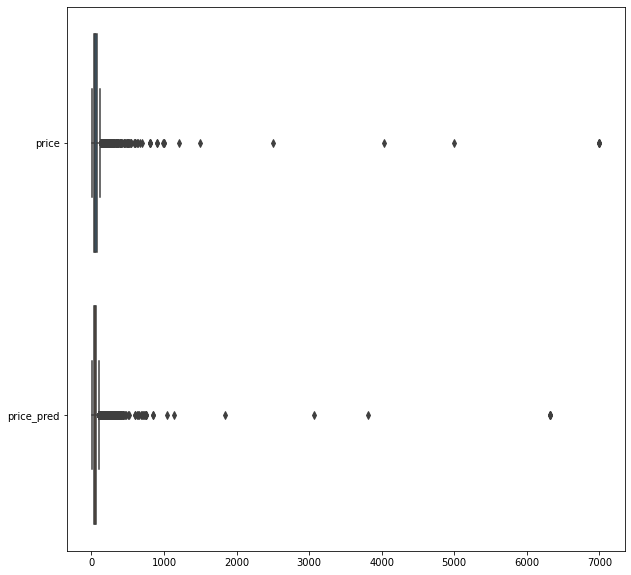

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df[['price','price_pred']],orient="h") #boxplot horizontal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead

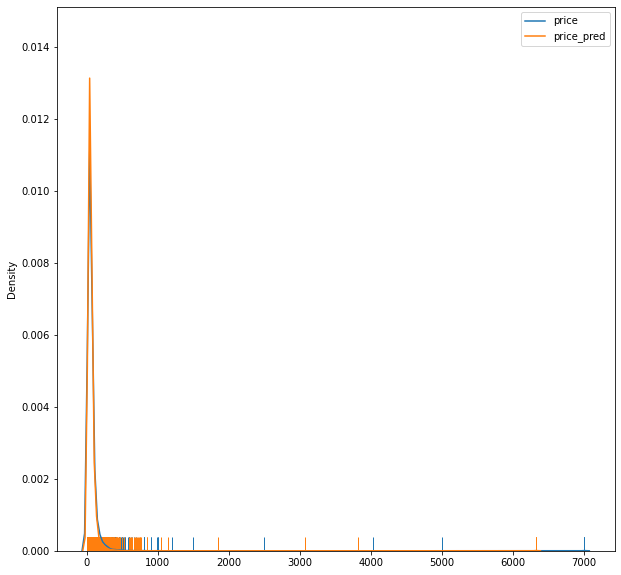

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df[['price']],rug=True,hist=False,ax=ax,label='price')
sns.distplot(df[['price_pred']],rug=True,hist=False,ax=ax,label='price_pred')
plt.legend()
plt.show()

Observaciones:
-	Los histogramas se ven muy similares, pero un poco recorridos a la izquierda
-	Las distribuciones se ven muy similares
-	Lo anterior tiene sentido puesto que se ajustó con la métrica del MAE el cual ajusta hacia la mediana, es decir no deja que se vea tan afectado por los datos atípicos


In [ ]:
residuals=df.price.values-df.price_pred.values
df['residuals']=residuals

In [ ]:
df['errCat2']=df['room_type'].values

In [ ]:
df.loc[df['errors']<=3.042103,'errCat2']='Muy_bueno'
df.loc[(df['errors']>3.042103) & (df['errors']<=6.932198),'errCat2']='Bueno'
df.loc[(df['errors']>6.932198) & (df['errors']<=14.016729),'errCat2']='Bueno'
df.loc[(df['errors']>14.016729) & (df['errors']<=14.016729+30.245614),'errCat2']='Medio'
df.loc[(df['errors']>14.016729+30.245614) & (df['errors']<=100),'errCat2']='Malo'
df.loc[df['errors']>100,'errCat2']='Muy_malo'

-	Calculamos los errores (valor absoluto de los precios reales menos las predicciones)
-	Obtenemos margenes segun los cuantiles de los errores
-	Categorizamos según estos margenes


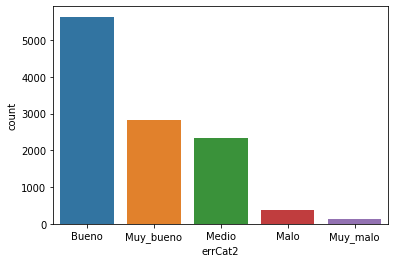

In [ ]:
sns.countplot(x='errCat2',data=df)
plt.show()

In [ ]:
df.errCat2.value_counts()/len(df)

Bueno        0.499956
Muy_bueno    0.250022
Medio        0.206872
Malo         0.032496
Muy_malo     0.010654
Name: errCat2, dtype: float64

Observaciones:

- El modelo tiene buen desempeño, la mayoría de casos caen en las categorías Bueno, muy bueno y medio (95%). Las categorías estan basadas en los cuantiles de los errores

In [ ]:
#checar precios por latitud longitud
fig = px.scatter(df, x='price_pred', y='residuals', color='errCat2' , hover_data=['room_type','errorCat'])
y = np.zeros((7000,))
x = np.arange(7000)
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    name='0 varianza',
))
fig.update_layout(autosize=True,width=650,height=650,)
fig.show()

- La varianza parece ser constante hasta la categoría media, después comienza a variar significativamente

In [ ]:
#checar precios por latitud longitud
fig = px.scatter(df, x='price', y='price_pred', color= 'errCat2', hover_data=['room_type','errors'])
x = np.arange(7000)
fig.add_trace(go.Scatter(
    x=x,
    y=x,
    name='Good',
))
fig.update_layout(autosize=True,width=650,height=650,)
fig.show()


Observaciones:
-	Si caen muy cerca de la línea a 45 grados quiere decir que el ajuste para esas observaciones fue muy bueno, pero mientras mas alejado de esta línea el error aumentará
-	Aproximadamente el 95% de los casos caen dentro del margen de tolerancia 


In [ ]:
#checar precios por latitud longitud

fig = px.scatter(df, x='price', y='price_pred', color= 'errors', hover_data=['errorCat','room_type'])
x = np.arange(7000)
fig.add_trace(go.Scatter(
    x=x,
    y=x,
    name='Good',
))

fig.update_layout(autosize=True,width=650,height=650,)
fig.show()


Observaciones:
-	El máximo fue para una observación de la categoría shared room


In [ ]:
table = pd.pivot_table(df, values='errors', index=['room_type'],columns=['errCat2'], aggfunc=np.mean)
t1=table.sort_values(by=['Muy_bueno']).tail(10)
t1

errCat2,Bueno,Malo,Medio,Muy_bueno,Muy_malo
room_type,,,,,
Shared room,6.050093,68.004789,17.603138,0.945219,885.031830
Private room,6.711219,66.710550,25.260361,1.256719,267.231841
Entire home/apt,7.507396,62.604020,22.877979,1.525123,169.309991
Hotel room,6.864761,65.333862,23.880278,1.608899,450.009889


In [ ]:
t2=table.sort_values(by=['Muy_malo']).tail(10)
t2

errCat2,Bueno,Malo,Medio,Muy_bueno,Muy_malo
room_type,,,,,
Entire home/apt,7.507396,62.604020,22.877979,1.525123,169.309991
Private room,6.711219,66.710550,25.260361,1.256719,267.231841
Hotel room,6.864761,65.333862,23.880278,1.608899,450.009889
Shared room,6.050093,68.004789,17.603138,0.945219,885.031830


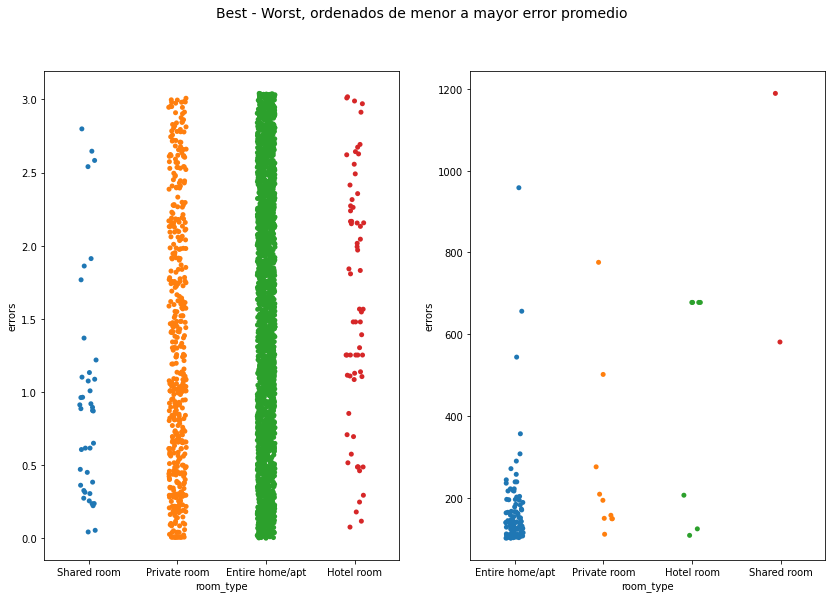

In [ ]:
f, ax = plt.subplots(figsize=(14,9))


plt.subplot(1,2,1)
sns.stripplot(x='room_type',y='errors',order=t1.index, data=df[df.errCat2=='Muy_bueno'])
t= f.suptitle('Best - Worst, ordenados de menor a mayor error promedio', fontsize=14)

plt.subplot(1,2,2)
sns.stripplot(x='room_type',y='errors',order=t2.index, data=df[df.errCat2=='Muy_malo'])
		

plt.show()

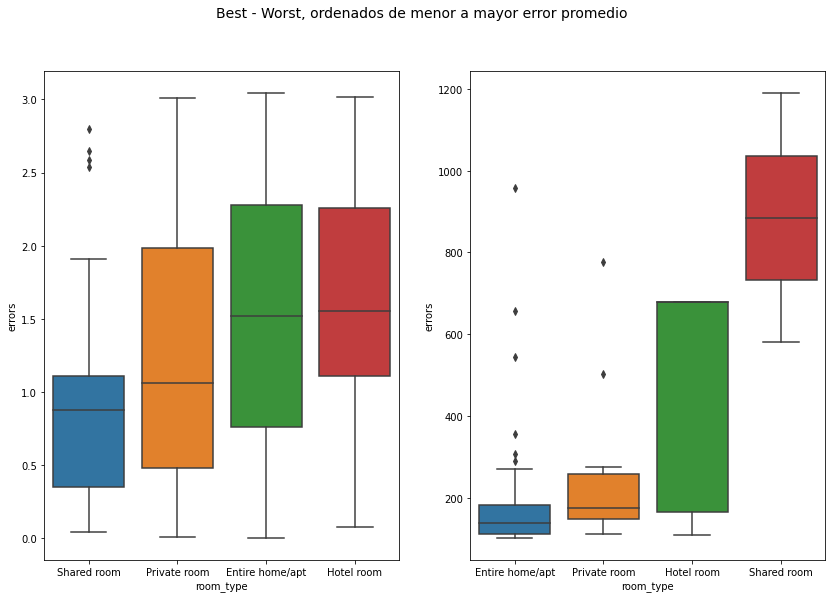

In [ ]:
f, ax = plt.subplots(figsize=(14,9))


plt.subplot(1,2,1)
sns.boxplot(x='room_type',y='errors',order=t1.index, data=df[df.errCat2=='Muy_bueno']) #boxplot horizontal
t= f.suptitle('Best - Worst, ordenados de menor a mayor error promedio', fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='room_type',y='errors',order=t2.index, data=df[df.errCat2=='Muy_malo']) #boxplot horizontal
		

plt.show()

Observaciones:
-	El segmento que obtuvo un mejor desempeño fue para la categoría Shared room, sim embargo algunas pocas observaciones  de esta categoría también tuvieron el peor desempeño, seguido de la categoría Hotel room
- Dentro de los mejores conjuntos, todas las categorías tienen un desempeño muy similar
- Dentro de las peores, hace sentido que las dos peores categorías sean Hotel room y shared room, puesto que son de las que menos hay ejemplos, y puede existir gran variabilidad en las características de estas que el modelo no fue capaz de aprender dentro del entrenamiento debido a la falta de ejemplos.
